## Import librairies

In [ ]:
%matplotlib inline

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from yellowbrick.cluster import InterclusterDistance, SilhouetteVisualizer, KElbowVisualizer


pd.set_option("display.max_columns", None)

## Load the dataset

We will start by loading the digits dataset. This dataset contains handwritten digits from 0 to 9. In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.

In [ ]:
digits = load_digits()  # Dimensionality: 64 features

X, labels = digits.data, digits.target
images = digits.images

# column name for 64
column_names = [f"X{i}" for i in range(64)]

data = pd.DataFrame(X, columns=column_names).assign(label=labels)

(n_samples, n_features), n_digits = X.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [ ]:
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## EDA

<ipython-input-3-5a6f7f88c0c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='tab10')


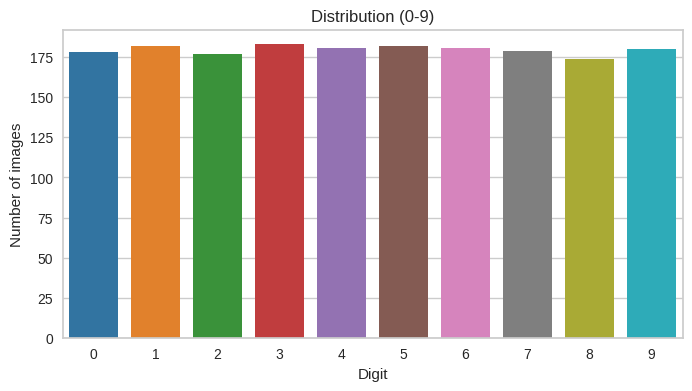

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=data, palette='tab10')

plt.title("Distribution (0-9)")
plt.xlabel("Digit")
plt.ylabel("Number of images")
plt.show()

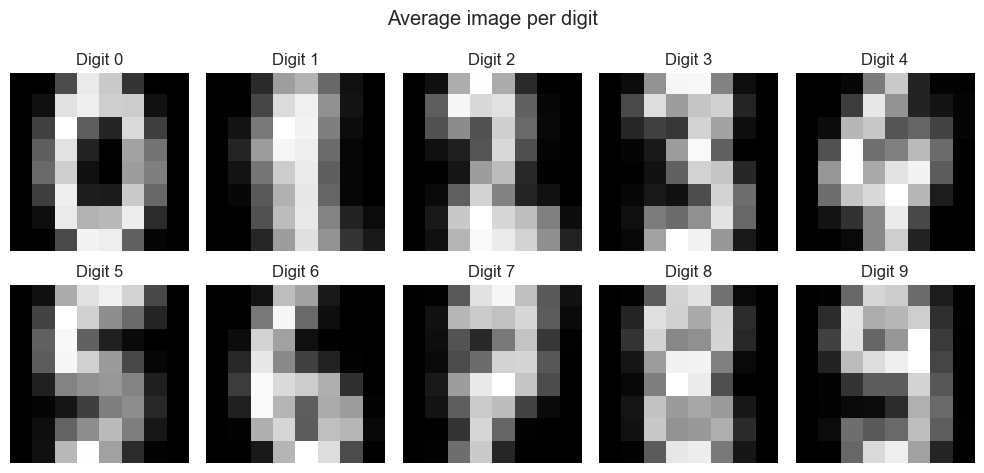

In [ ]:
# mean by digit
mean_images = np.zeros((10, 64))  # 64 pixels
for i in range(10):
    mean_images[i] = data.loc[data.label == i, column_names].mean(axis=0)


fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(mean_images[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')
plt.suptitle("Average image per digit")
plt.tight_layout()
plt.show()

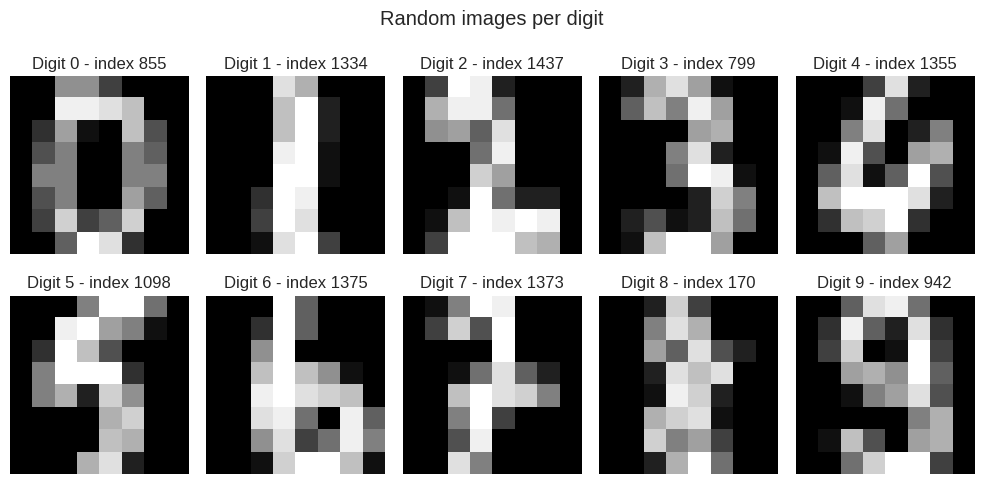

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91, hspace=0.5)

for i, label in enumerate(np.unique(labels)):
    ax = axs[i // 5, i % 5]
    # Random choice by digit
    idx = np.random.choice(np.where(labels == label)[0])
    ax.imshow(images[idx], cmap='gray')
    ax.set_title(f"Digit {label} - index {idx}")
    ax.axis('off')

plt.suptitle("Random images per digit")
plt.tight_layout()
plt.show();

## Define our evaluation benchmark

We will first our evaluation benchmark. During this benchmark, we intend to compare different initialization methods for KMeans. Our benchmark will:

create a pipeline which will scale the data using a StandardScaler;

train and time the pipeline fitting;

measure the performance of the clustering obtained via different metrics.


In [ ]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]


    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

### Run benchmark

In [ ]:
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=X, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=X, labels=labels)

pca = PCA(n_components=n_digits).fit(X)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=X, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	silhouette
k-means++	0.185s	4647	0.739	0.747	0.743	0.669	0.168
random   	0.058s	4648	0.735	0.742	0.738	0.667	0.172
PCA-based	0.021s	4647	0.744	0.753	0.749	0.673	0.190
__________________________________________________________________________________


## Optimal number of clusters

In [ ]:
scaler = MinMaxScaler()  # StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method

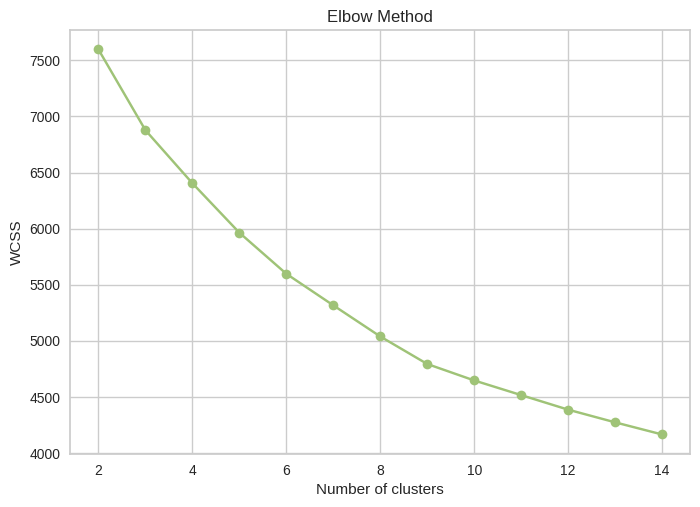

In [ ]:
wcss = []  # Within-Cluster Sum of Squares

k_grid = range(2, 15)
for i in k_grid:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_grid, wcss, 'go-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Yellow brick lib

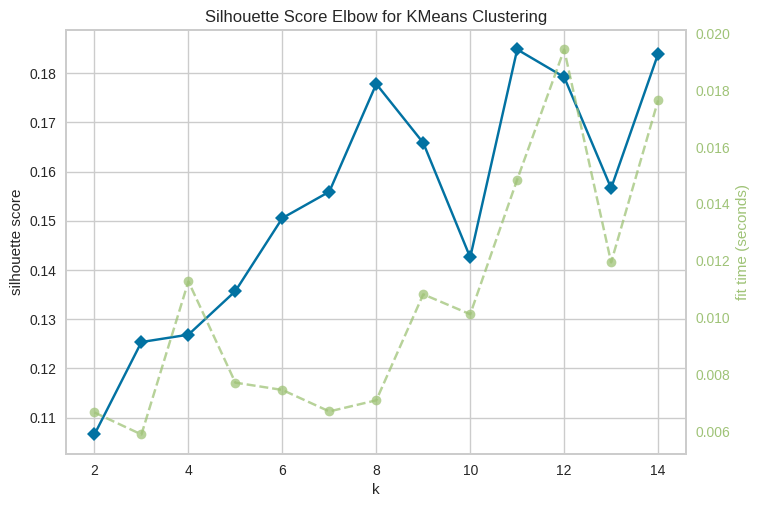

In [ ]:
# Instantiate the clustering model and visualizer

# - **distortion**: mean sum of squared distances to centers
# - **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
# - **calinski_harabasz**: ratio of within to between cluster dispersion


visualizer = KElbowVisualizer(KMeans(),
                              metric='silhouette',  # possible values: calinski_harabasz, distortion, silhouette
                              distance_metric="euclidean", # options allowed by sklearn's metrics.pairwise.pairwise_distances
                              k=k_grid,
                              timings=True,
                              locate_elbow=False, # True or False
                             )

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();       # Finalize and render the figure

## Visualize the results on PCA-reduced data


### Profiling: cluster persona

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

kmean_labels = kmeans.labels_

In [ ]:
data["cluster"] = kmean_labels
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,label,cluster
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,5
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,8
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,7
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,9
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,6


In [ ]:
# Mapping cluster => label
contingency_table = pd.crosstab(data["cluster"], data["label"])
contingency_table

label,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0,0,119,37,0,4,0,2,4,5
1,16,0,0,0,16,5,143,0,0,1
2,2,25,32,11,0,42,0,1,69,19
3,0,9,5,12,3,23,0,115,24,9
4,3,4,4,26,0,43,0,0,3,124
5,156,1,0,0,0,6,7,0,0,0
6,1,2,0,0,148,2,29,1,1,0
7,0,52,13,0,4,55,2,37,69,10
8,0,89,1,0,10,1,0,23,4,0


In [ ]:
major_digit = contingency_table.idxmax(axis=1)
print(major_digit)

cluster
0    7
1    0
2    9
3    4
4    8
5    8
6    6
7    3
8    2
9    1
dtype: int64


In [ ]:
for cluster_id in range(n_digits):
    cluster_indices = np.where(kmean_labels == cluster_id)
    cluster_images = X[cluster_indices]
    mean_image = cluster_images.mean(axis=0).reshape(8, 8)

    plt.subplot(2, 5, cluster_id + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Cluster n°{cluster_id}")
    plt.axis('off')

plt.suptitle("Mean images per cluster")
plt.tight_layout()
plt.show()

### Visualization

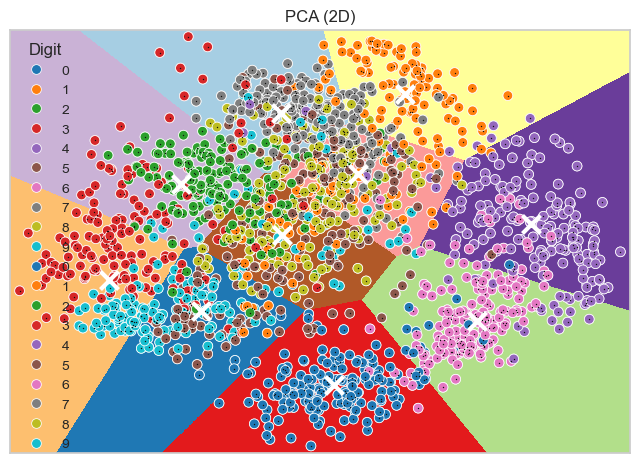

In [ ]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data.label, palette='tab10', legend='full')
plt.title("PCA (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Digit")
plt.show()


In [ ]:


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());

## Intercluster Distance Maps

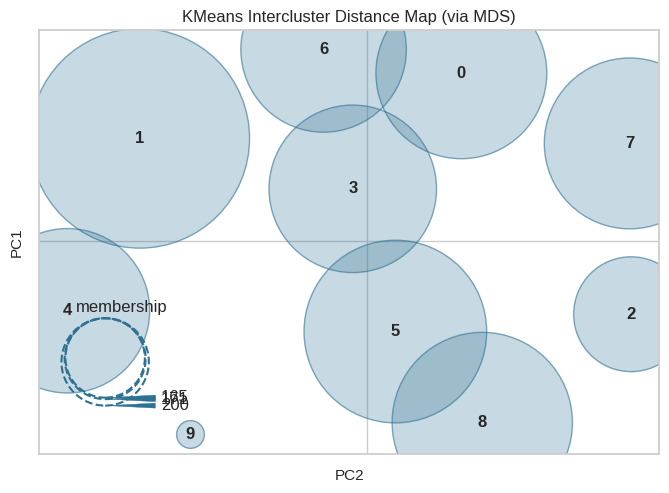

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(10)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Visualisation with TSNE

In [ ]:
# Initialize
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)


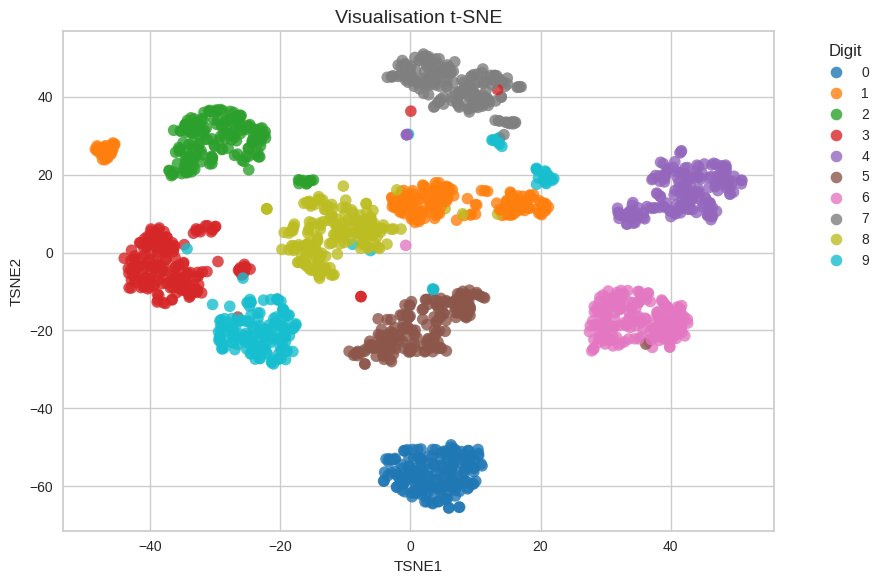

In [ ]:
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['label'] = labels # Conversion en string pour une discrétisation catégorielle

# Plot
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='label',
    palette='tab10',
    alpha=0.8,
    s=70,
    edgecolor='none'
)
plt.title('Visualisation t-SNE', fontsize=14)
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# TP Clustering

##  Optimisons k-means avec au moins 3 hyperparamètres

Test done: {'n_clusters': 8, 'init': 'k-means++', 'n_init': 10, 'scaler': 'NoneType', 'use_pca': True, 'time': 0.09540796279907227, 'inertia': 1168371.077018754, 'homogeneity': np.float64(0.6657782198086796), 'completeness': np.float64(0.7604585979836025), 'v_measure': np.float64(0.7099757421596229), 'ARI': 0.5761024497430367, 'silhouette': np.float64(0.2030491342002838)}
Test done: {'n_clusters': 8, 'init': 'k-means++', 'n_init': 20, 'scaler': 'NoneType', 'use_pca': True, 'time': 0.1853487491607666, 'inertia': 1168371.077018754, 'homogeneity': np.float64(0.6657782198086796), 'completeness': np.float64(0.7604585979836025), 'v_measure': np.float64(0.7099757421596229), 'ARI': 0.5761024497430367, 'silhouette': np.float64(0.2030491342002838)}
Test done: {'n_clusters': 8, 'init': 'random', 'n_init': 10, 'scaler': 'NoneType', 'use_pca': True, 'time': 0.11620593070983887, 'inertia': 1169959.226189927, 'homogeneity': np.float64(0.6385918821242104), 'completeness': np.float64(0.7252247283433686

<ipython-input-39-367773f7821c>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


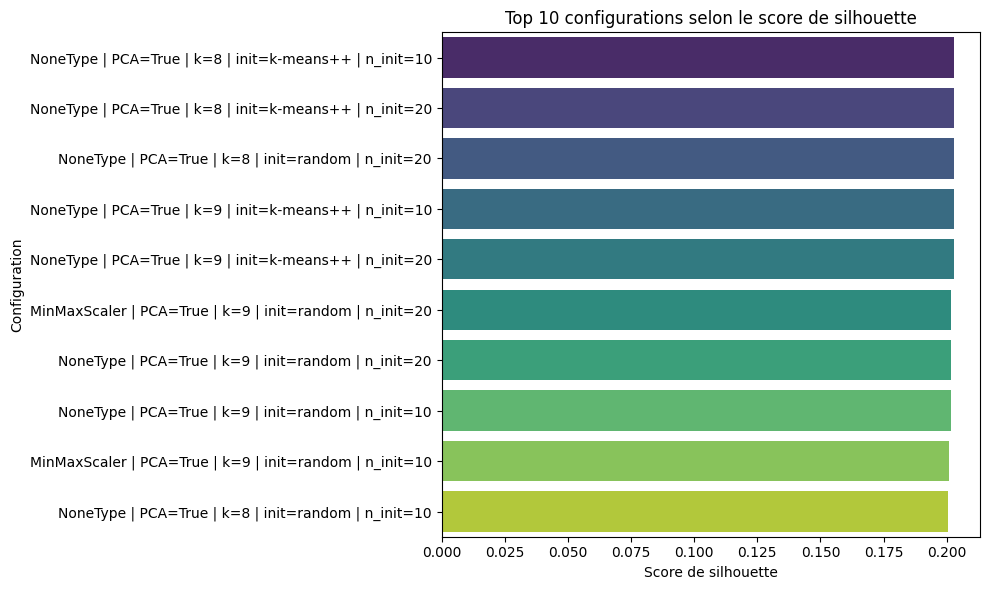

In [39]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import pandas as pd
from time import time

# Chargement des données
digits = load_digits()
X = digits.data
y = digits.target

# Standardisation (fixe ici pour commencer)
scaler = MinMaxScaler()

def eval_kmeans(X, y, n_clusters, init, n_init, scaler, use_pca):
    if use_pca:
        pca = PCA(n_components=0.95)
        X = pca.fit_transform(X)
    if scaler:
        pipeline = Pipeline([
            ('scaler', scaler),
            ('kmeans', KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=42))
        ])
    else:
        pipeline = Pipeline([
            ('kmeans', KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=42))
        ])
    t0 = time()
    pipeline.fit(X)
    fit_time = time() - t0

    labels_pred = pipeline.named_steps['kmeans'].labels_
    inertia = pipeline.named_steps['kmeans'].inertia_

    # Calcul d’indicateurs
    homo = metrics.homogeneity_score(y, labels_pred)
    compl = metrics.completeness_score(y, labels_pred)
    v_mes = metrics.v_measure_score(y, labels_pred)
    ari = metrics.adjusted_rand_score(y, labels_pred)

    silhouette = metrics.silhouette_score(X, labels_pred, sample_size=300, random_state=42)

    return {
        'n_clusters': n_clusters,
        'init': init,
        'n_init': n_init,
        'scaler': scaler.__class__.__name__,
        'use_pca': use_pca,
        'time': fit_time,
        'inertia': inertia,
        'homogeneity': homo,
        'completeness': compl,
        'v_measure': v_mes,
        'ARI': ari,
        'silhouette': silhouette
    }

# Grille d'hyperparamètres
n_clusters_list = [8,9,10,11,12]
init_list = ['k-means++', 'random']
n_init_list = [10, 20]

results = []
scalers = [None, MinMaxScaler(),StandardScaler(),RobustScaler()]
for use_pca in [True, False]:
  for scaler in scalers:
      for n_clusters in n_clusters_list:
          for init in init_list:
              for n_init in n_init_list:
                res = eval_kmeans(X, y, n_clusters, init, n_init, scaler, use_pca)
                results.append(res)
                print(f"Test done: {res}")

# Mise en DataFrame et tri par v_measure
df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by='silhouette', ascending=False).head()
df_sorted

import matplotlib.pyplot as plt
import seaborn as sns

# Tri des meilleurs modèles selon le score silhouette
top_silhouette = df_results.sort_values(by='silhouette', ascending=False).head(10)

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_silhouette,
    x='silhouette',
    y=top_silhouette.apply(lambda row: f"{row['scaler']} | PCA={row['use_pca']} | k={row['n_clusters']} | init={row['init']} | n_init={row['n_init']}", axis=1),
    palette='viridis'
)
plt.xlabel('Score de silhouette')
plt.ylabel('Configuration')
plt.title('Top 10 configurations selon le score de silhouette')
plt.tight_layout()
plt.show()


In [32]:
best_config = df_results.sort_values(by='silhouette', ascending=False).iloc[0]


# Interprétation du modèle KMeans

Le modèle KMeans avec 8 clusters, initialisation `k-means++`, sans mise à l’échelle mais avec PCA (réduction à 95 % de la variance), obtient de bonnes performances :

- **8 clusters** au lieu des 10 classes réelles, reflétant des regroupements de chiffres similaires.
- **PCA** aide à simplifier les données et réduire le bruit, compensant l’absence de normalisation.
- **Temps d’entraînement rapide** (~0.056 s).
- **Inertie élevée** due à l’absence de scaler.
- **Homogénéité modérée (0.666)** : les clusters sont relativement purs.
- **Bonne complétude (0.760)** : les classes sont bien regroupées.
- **V-measure (0.71)** témoigne d’un bon compromis entre homogénéité et complétude.
- **ARI (0.576)** indique une correspondance modérée entre clusters et classes réelles.
- **Silhouette (0.203)** suggère une séparation correcte mais perfectible entre clusters.

En résumé, ce modèle capture assez bien la structure des données avec un bon équilibre entre précision et exhaustivité, mais peut être amélioré notamment en ajustant le nombre de clusters ou en testant une mise à l’échelle.


# Preparation des données

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# Reprendre les paramètres
n_clusters = best_config['n_clusters']
init = best_config['init']
n_init = best_config['n_init']
scaler_name = best_config['scaler']
use_pca = best_config['use_pca']

# Appliquer scaler
X_transformed = X.copy()
if scaler_name == 'MinMaxScaler':
    scaler = MinMaxScaler()
elif scaler_name == 'StandardScaler':
    scaler = StandardScaler()
elif scaler_name == 'RobustScaler':
    scaler = RobustScaler()
else:
    scaler = None

if scaler:
    X_transformed = scaler.fit_transform(X_transformed)

# Appliquer PCA si activé
if use_pca:
    pca = PCA(n_components=0.95)
    X_transformed = pca.fit_transform(X_transformed)

# Appliquer KMeans
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=42)
labels_pred = kmeans.fit_predict(X_transformed)


# Visualisation du profil moyen par cluster

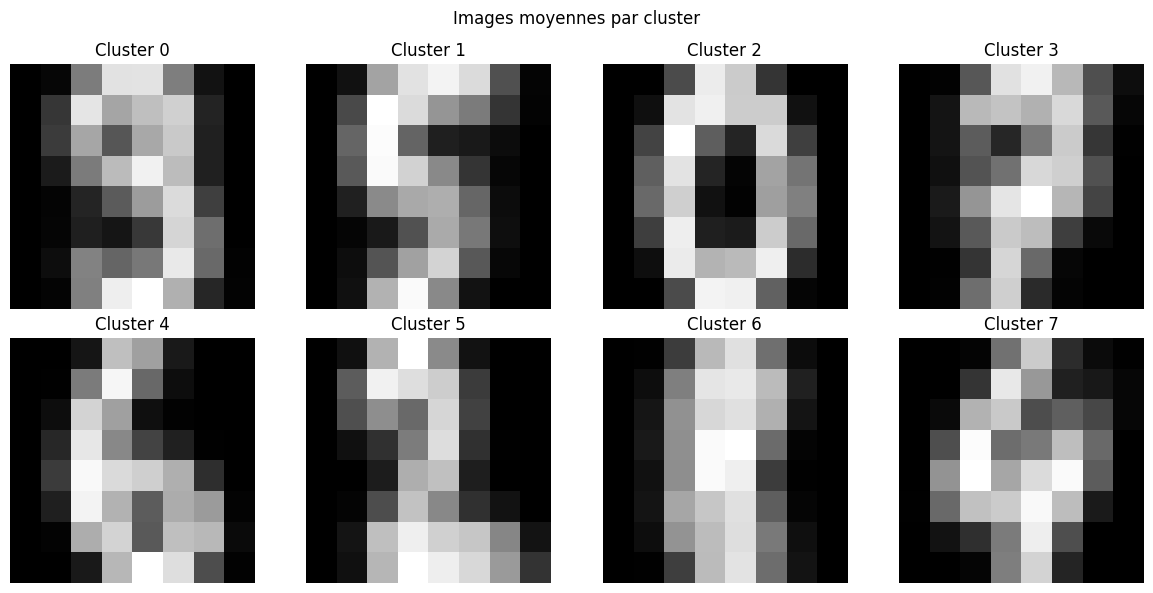

In [38]:
# Calculer les images moyennes dans l’espace original (8x8 pixels)
mean_images = np.zeros((n_clusters, X.shape[1]))
for i in range(n_clusters):
    mean_images[i] = X[labels_pred == i].mean(axis=0)

# Affichage des images moyennes par cluster
fig, axs = plt.subplots(2, (n_clusters + 1) // 2, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    if i < n_clusters:
        ax.imshow(mean_images[i].reshape(8, 8), cmap='gray')
        ax.set_title(f"Cluster {i}")
    ax.axis('off')

plt.suptitle("Images moyennes par cluster")
plt.tight_layout()
plt.show()

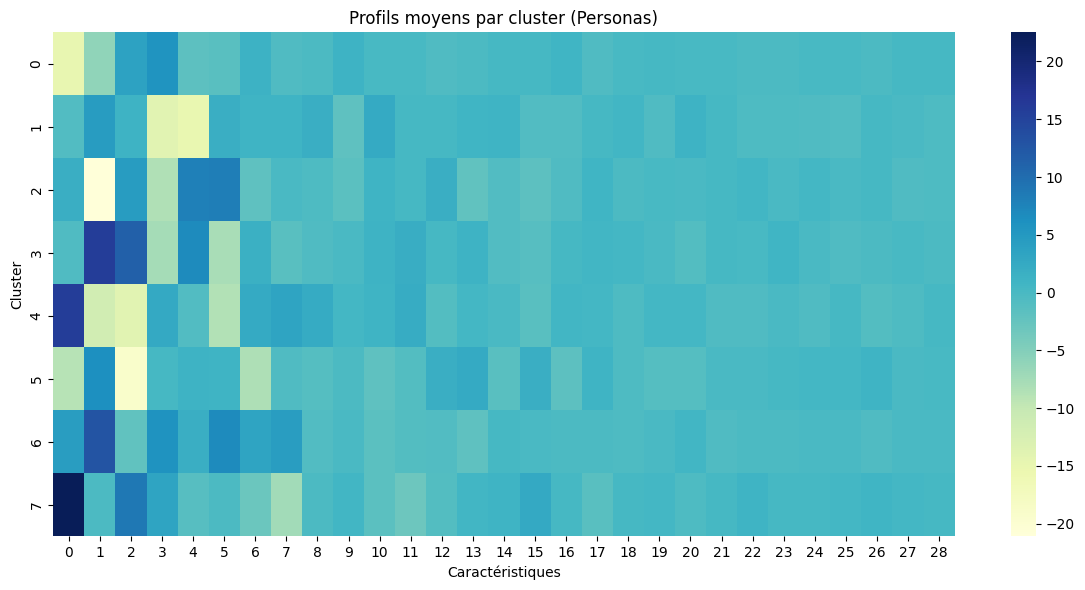

In [35]:
import pandas as pd

# Création d’un DataFrame avec les labels
df_personas = pd.DataFrame(X_transformed)
df_personas['cluster'] = labels_pred

# Moyennes par cluster
personas = df_personas.groupby('cluster').mean()

# Visualisation des profils
plt.figure(figsize=(12, 6))
sns.heatmap(personas, cmap='YlGnBu', annot=False)
plt.title("Profils moyens par cluster (Personas)")
plt.xlabel("Caractéristiques")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


# Visualisation avec la TSNE

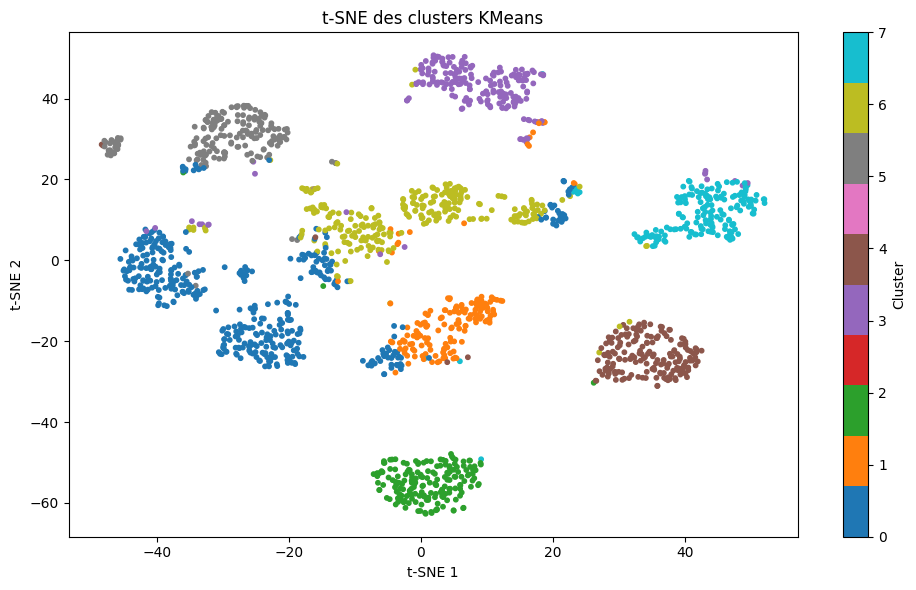

In [34]:
# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_transformed)

# Visualisation
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_pred, cmap='tab10', s=10)
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE des clusters KMeans')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()
